In [1]:
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from datetime import datetime
import distutils.dir_util
from keras.callbacks import CSVLogger
from keras.layers import Dense, Input, Lambda, BatchNormalization, Conv2D, ZeroPadding2D, MaxPooling2D, AveragePooling2D, Activation, Flatten, Dropout
from keras.applications.resnet50 import ResNet50
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import glob 
import os
import numpy as np

from keras import __version__
print(__version__)

from __future__ import division

Using TensorFlow backend.


2.0.4


# Data Prep

In [3]:
DATA_ROOT_DIR = "/home/ubuntu/data/fish"
TEST_STG1_DIR = DATA_ROOT_DIR + '/test_stg1/'
TEST_STG2_DIR = DATA_ROOT_DIR + '/test_stg2/'
RESULTS_DIR = DATA_ROOT_DIR + '/results/'

SAMPLE_ROOT_DIR = DATA_ROOT_DIR + "/sample/"
TRAIN_SAMPLE_DIR = SAMPLE_ROOT_DIR + '/train/'
VALID_SAMPLE_DIR = SAMPLE_ROOT_DIR + '/valid/'
TRAIN_DIR = DATA_ROOT_DIR + '/train/'
VALID_DIR = DATA_ROOT_DIR + '/valid/'
TRAIN_DIR_b = DATA_ROOT_DIR + '/train_b/'
VALID_DIR_b = DATA_ROOT_DIR + '/valid_b/'

In [3]:
%mkdir -p $VALID_DIR
%mkdir -p $RESULTS_DIR
%mkdir -p $TRAIN_SAMPLE_DIR
#%mkdir -p $VALID_SAMPLE_DIR # "OMITTED AS VALIDATION SIZE QUITE SMALL ANYWAY"
%mkdir -p $TEST_STG1_DIR/unknown
%mkdir -p $TEST_STG2_DIR/unknown

In [3]:
%cd '/home/ubuntu/data/fish/'
%mkdir -p $TRAIN_DIR_b
%mkdir -p $VALID_DIR_b


/home/ubuntu/data/fish


In [4]:
!unzip sample_submission_stg1.csv.zip
!unzip sample_submission_stg2.csv.zip
!unzip test_stg1.zip
!7za e test_stg2.7z
!unzip train.zip

unzip:  cannot find or open sample_submission_stg1.csv.zip, sample_submission_stg1.csv.zip.zip or sample_submission_stg1.csv.zip.ZIP.
unzip:  cannot find or open sample_submission_stg2.csv.zip, sample_submission_stg2.csv.zip.zip or sample_submission_stg2.csv.zip.ZIP.
unzip:  cannot find or open test_stg1.zip, test_stg1.zip.zip or test_stg1.zip.ZIP.
/bin/sh: 1: 7za: not found
unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [4]:
print(TRAIN_DIR)
print(TRAIN_SAMPLE_DIR)

/home/ubuntu/data/fish/train/
/home/ubuntu/data/fish/sample//train/


In [32]:
%cd '/home/ubuntu/data/fish/'
!unzip -n train.zip

/home/ubuntu/data/fish
Archive:  train.zip
file #1:  bad zipfile offset (local header sig):  0
file #2:  bad zipfile offset (local header sig):  52
file #3:  bad zipfile offset (local header sig):  573
file #4:  bad zipfile offset (local header sig):  628
file #5:  bad zipfile offset (local header sig):  689
file #6:  bad zipfile offset (local header sig):  829
file #7:  bad zipfile offset (local header sig):  885
  inflating: train/ALB/img_00057.jpg  
  inflating: train/ALB/img_00134.jpg  
  inflating: train/ALB/img_00228.jpg  
  inflating: train/ALB/img_00237.jpg  
  inflating: train/ALB/img_00275.jpg  
  inflating: train/ALB/img_00281.jpg  
  inflating: train/ALB/img_00301.jpg  
  inflating: train/ALB/img_00317.jpg  
  inflating: train/ALB/img_00338.jpg  
  inflating: train/ALB/img_00344.jpg  
  inflating: train/ALB/img_00366.jpg  
  inflating: train/ALB/img_00425.jpg  
  inflating: train/ALB/img_00451.jpg  
  inflating: train/ALB/img_00466.jpg  
  inflating: train/ALB/img_00482.jpg

  inflating: train/ALB/img_07171.jpg  
  inflating: train/ALB/img_07197.jpg  
  inflating: train/ALB/img_07200.jpg  
  inflating: train/ALB/img_07255.jpg  
  inflating: train/ALB/img_07307.jpg  
  inflating: train/ALB/img_07381.jpg  
  inflating: train/ALB/img_07435.jpg  
  inflating: train/ALB/img_07470.jpg  
  inflating: train/ALB/img_07489.jpg  
  inflating: train/ALB/img_07492.jpg  
  inflating: train/ALB/img_07527.jpg  
  inflating: train/ALB/img_07537.jpg  
  inflating: train/ALB/img_07542.jpg  
  inflating: train/ALB/img_07566.jpg  
  inflating: train/ALB/img_07652.jpg  
  inflating: train/ALB/img_07686.jpg  
  inflating: train/ALB/img_07869.jpg  
  inflating: train/ALB/img_07874.jpg  
  inflating: train/ALB/img_07877.jpg  
  inflating: train/BET/img_00231.jpg  
  inflating: train/BET/img_00441.jpg  
  inflating: train/BET/img_00443.jpg  
  inflating: train/BET/img_00491.jpg  
  inflating: train/BET/img_00537.jpg  
  inflating: train/BET/img_01215.jpg  
  inflating: train/BET/im

  inflating: train/YFT/img_01675.jpg  
  inflating: train/YFT/img_01783.jpg  
  inflating: train/YFT/img_01784.jpg  
  inflating: train/YFT/img_02075.jpg  
  inflating: train/YFT/img_02199.jpg  
  inflating: train/YFT/img_02258.jpg  
  inflating: train/YFT/img_02274.jpg  
  inflating: train/YFT/img_02493.jpg  
  inflating: train/YFT/img_02516.jpg  
  inflating: train/YFT/img_02642.jpg  
  inflating: train/YFT/img_02707.jpg  
  inflating: train/YFT/img_02809.jpg  
  inflating: train/YFT/img_02846.jpg  
  inflating: train/YFT/img_02884.jpg  
  inflating: train/YFT/img_02918.jpg  
  inflating: train/YFT/img_03183.jpg  
  inflating: train/YFT/img_03196.jpg  
  inflating: train/YFT/img_03253.jpg  
  inflating: train/YFT/img_03367.jpg  
  inflating: train/YFT/img_03372.jpg  
  inflating: train/YFT/img_03460.jpg  
  inflating: train/YFT/img_03464.jpg  
  inflating: train/YFT/img_03558.jpg  
  inflating: train/YFT/img_03567.jpg  
  inflating: train/YFT/img_03649.jpg  
  inflating: train/YFT/im

In [5]:
%cd '/home/ubuntu/data/fish/train'
!ls | while read line; do echo "$line"=`ls "$line" | wc -l`; done

/home/ubuntu/data/fish/train
ALB=1320
BET=157
DOL=95
LAG=50
NoF=360
OTHER=223
SHARK=129
YFT=562


In [6]:
%cd '/home/ubuntu/data/fish/train_b'
!ls | while read line; do echo "$line"=`ls "$line" | wc -l`; done

/home/ubuntu/data/fish/train_b
ALB=1718
BET=200
DOL=117
LAG=67
NoF=465
OTHER=299
SHARK=176
YFT=734


In [7]:
print(1718+200+117+67+465+299+176+734)

3776


In [ ]:
# random selection for validation first

In [10]:
%cd /home/ubuntu/data/fish/train

print(TRAIN_DIR)
print(VALID_DIR)

g = glob.glob('*')
for d in g: os.mkdir('../valid/'+d)

g = glob.glob('*/*.jpg')
shuf = np.random.permutation(g)
for i in range(500): os.rename(shuf[i], '../valid/' + shuf[i])


/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train/
/home/ubuntu/data/fish/valid/


In [6]:
%cd '/home/ubuntu/data/fish/valid'
!ls | while read line; do echo "$line"=`ls "$line" | wc -l`; done

/home/ubuntu/data/fish/valid
ALB=226
BET=23
DOL=10
LAG=10
NoF=58
OTHER=46
SHARK=29
YFT=98


In [17]:
# 10% selection for validation first
%cd /home/ubuntu/data/fish/train_b
print(TRAIN_DIR_b)
print(VALID_DIR_b)

def create_validation(class_name, sample_size):
    %cd $TRAIN_DIR
    %mkdir -p $VALID_DIR_b/$class_name
    g = glob.glob(class_name+'/*.jpg')
    shuf = np.random.permutation(g)
    for i in range(sample_size): os.rename(shuf[i], VALID_DIR_b + shuf[i])    
    
create_validation("ALB", 172)
create_validation("BET", 20)
create_validation("DOL", 12)
create_validation("LAG", 7)
create_validation("NoF", 47)
create_validation("OTHER", 30)
create_validation("SHARK", 18)
create_validation("YFT", 74)

/home/ubuntu/data/fish/train_b
/home/ubuntu/data/fish/train_b/
/home/ubuntu/data/fish/valid_b/
/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train
/home/ubuntu/data/fish/train


In [18]:
%cd '/home/ubuntu/data/fish/valid_b'
!ls | while read line; do echo "$line"=`ls "$line" | wc -l`; done

/home/ubuntu/data/fish/valid_b
ALB=172
BET=20
DOL=12
LAG=7
NoF=47
OTHER=30
SHARK=18
YFT=74


# Create and train model

create base model
inlclude_top qualifier = True gives you all layers, the final layer has a 1000 classes.
inlclude_top qualifier = False gives you all but the last two layers flatten_2 and fc1000


Push validation and training images through base Resnet model and save the output. This allows us to use this output for the input of our new layers, saving lots of time/compute. It is this output we put into our new layers and not the original images. 

In [8]:
# create base model
test_resnet_base = ResNet50(include_top=True, weights='imagenet')
print test_resnet_base.summary()

resnet_base = ResNet50(include_top=False, weights='imagenet')
print resnet_base.summary()

classifier_input_shape = (1, 1, 2048)
classifier_input = Input(shape=classifier_input_shape)
# input_shape is the shape of the last layer of the base model.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D) (None, None, None, 3) 0           input_2[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, None, None, 64 9472        zero_padding2d_2[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, None, None, 64 256         conv1[0][0]                      
___________________________________________________________________________________________

create training and validation image generators

Python generators functions allow you to declare a function that behaves like an iterator, i.e. it can be used in a for loop. 

In [9]:
# normalise the images  - Zero-center by mean pixel
def preprocess_input(x, data_format=None):
    x = x[:, :, ::-1]
    x[:, :, 0] -= 103.939
    x[:, :, 1] -= 116.779
    x[:, :, 2] -= 123.68
    return x

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
        rescale=1.25)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
#
# don't shuffle on training as labels and data will muddle...
# batch size is about performance, decide given data volume/machine resource.
#
train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/fish/train_b',
        target_size=(224, 224),
        batch_size=56,
        shuffle=False,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/home/ubuntu/data/fish/valid_b',
        target_size=(224, 224),
        shuffle=False,
        #batch_size=batch_size,
        batch_size=20,
        class_mode='categorical')

Found 3776 images belonging to 8 classes.
Found 380 images belonging to 8 classes.


In [10]:
# funciton to create filenames, labels and convolutional features, i.e. the output from the base resnet layers
# it is this data that we will then use as the input into the layers we create specifially for the fish species 
#

def create_precomputed_data(model, batches):
    filenames = batches.filenames
    conv_features = model.predict_generator(batches, (batches.samples/batches.batch_size ))
    labels = to_categorical(batches.classes)
    return (filenames, conv_features, labels)

In [11]:
#trn_filenames, trn_conv_features, trn_labels = create_precomputed_data(resnet_base, train_generator_test)
trn_filenames, trn_conv_features, trn_labels = create_precomputed_data(resnet_base, train_generator)
val_filenames, val_conv_features, val_labels = create_precomputed_data(resnet_base, validation_generator)

In [12]:
print "Training"
print "filenames, No.", len(trn_filenames)
print trn_filenames[0:5]
print "features, No.", len(trn_conv_features)
print trn_conv_features.shape
print trn_conv_features[0:5]
print "lables, No.", len(trn_labels)
print trn_labels[0:5]

Training
filenames, No. 3776
['ALB/img_07879.jpg', 'ALB/img_02201.jpg', 'ALB/img_04774.jpg', 'ALB/img_05396.jpg', 'ALB/img_03532.jpg']
features, No. 3776
(3776, 1, 1, 2048)
[[[[ 3.80975676  0.11542338  0.53016746 ...,  0.0557369   3.76227427
     0.05418305]]]


 [[[ 1.1598345   2.52526355  0.50065875 ...,  0.02576752  0.61471426
     1.87659717]]]


 [[[ 0.15520558  3.26744986  0.35423547 ...,  0.04161355  1.36786759
     0.18767869]]]


 [[[ 1.46410167  1.45698965  0.56918716 ...,  0.02761077  0.57972252
     1.19995403]]]


 [[[ 2.16331291  2.91117287  0.93336761 ...,  0.01582708  0.27407396
     2.23768067]]]]
lables, No. 3776
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]]


In [13]:
print trn_conv_features.shape
print val_conv_features.shape

(3776, 1, 1, 2048)
(380, 1, 1, 2048)


In [14]:
import bcolz

## save precomputed convolutional features

In [36]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

def save_precomputed_data(filenames, conv_feats, labels, features_base_name="ResNet50_conv_feats/trn_"):
    save_array(RESULTS_DIR+"/"+features_base_name+'filenames.dat', np.array(filenames))
    save_array(RESULTS_DIR+"/"+features_base_name+'conv_feats.dat', conv_feats)
    save_array(RESULTS_DIR+"/"+features_base_name+'labels.dat', np.array(labels))
    
save_precomputed_data(trn_filenames, trn_conv_features, trn_labels, "ResNet50_conv_feats/trn_")
save_precomputed_data(val_filenames, val_conv_features, val_labels, "ResNet50_conv_feats/val_")


## load precomputed convolutional features

In [10]:
def load_array(fname):
    return bcolz.open(fname)[:]

def load_precomputed_data(features_base_name="ResNet50_conv_feats/trn_"):
    filenames = load_array(RESULTS_DIR+"/"+features_base_name+'filenames.dat').tolist()
    conv_feats = load_array(RESULTS_DIR+"/"+features_base_name+'conv_feats.dat')
    labels = load_array(RESULTS_DIR+"/"+features_base_name+'labels.dat')
    return filenames, conv_feats, labels

trn_filenames, trn_conv_features, trn_labels = load_precomputed_data("ResNet50_conv_feats/trn_")
val_filenames, val_conv_features, val_labels = load_precomputed_data("ResNet50_conv_feats/val_")

In [15]:
# Create my new model, three layers input, flatten, dense(output)

x = Flatten()(classifier_input)
x = Dense(8, activation='softmax')(x)
                                           
# note to self: work through various activation functions.

classifier_model_v1 = Model(classifier_input, x)

#from keras.optimizers import SGD
classifier_model_v1.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
classifier_model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 1, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16392     
Total params: 16,392
Trainable params: 16,392
Non-trainable params: 0
_________________________________________________________________


In [16]:
def fit_precomputed_helper(model, result_dir_name, lr=0.1, nb_epoch=1):  
    K.set_value(model.optimizer.lr, lr)
    
    now = datetime.now().strftime("%Y%m%d_%H%M%S.h5")
    results_dir = RESULTS_DIR + "/" + result_dir_name + "/"
    distutils.dir_util.mkpath(results_dir)
    
    model.fit(trn_conv_features, trn_labels,
              batch_size=32, 
              epochs=nb_epoch,
              validation_data=(val_conv_features, val_labels),
              shuffle=True, 
              callbacks=[CSVLogger(results_dir+"epoch_results.csv", separator=',', append=True)])
    model.save_weights(results_dir + now)
    return model

# note we are fitting on our precomputed features not the original images.
#

In [21]:
classifier_model_v1 = fit_precomputed_helper(classifier_model_v1, "classifier_model_v1", lr=0.001, nb_epoch=20)

Train on 3776 samples, validate on 380 samples
Epoch 1/20
3776/3776 [==============================] - 0s - loss: 0.0059 - acc: 1.0000 - val_loss: 0.0366 - val_acc: 0.9921
Epoch 2/20
3776/3776 [==============================] - 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0520 - val_acc: 0.9895
Epoch 3/20
3776/3776 [==============================] - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0458 - val_acc: 0.9868
Epoch 4/20
3776/3776 [==============================] - 0s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0412 - val_acc: 0.9895
Epoch 5/20
3776/3776 [==============================] - 0s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0364 - val_acc: 0.9921
Epoch 6/20
3776/3776 [==============================] - 0s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0397 - val_acc: 0.9921
Epoch 7/20
3776/3776 [==============================] - 0s - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0405 - val_acc: 0.9895
Epoch 8/20
3776/3776 [==============================] - 0s - loss: 0.0060 - ac

In [22]:
classifier_model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 1, 2048)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16392     
Total params: 16,392
Trainable params: 16,392
Non-trainable params: 0
_________________________________________________________________


# Predict on test data

In [23]:
TEST_STG1_DIR = '/home/ubuntu/data/fish/test_stg1'
TEST_STG2_DIR = '/home/ubuntu/data/fish/test_stg2'


In [24]:
#%cd '/home/ubuntu/data/fish/test_stg1/'

%cd '/home/ubuntu/data/fish/test_stg1/'
!ls | while read line; do echo "$line"=`ls "$line" | wc -l`; done

%cd '/home/ubuntu/data/fish/test_stg2/'
!ls | while read line; do echo "$line"=`ls "$line" | wc -l`; done

/home/ubuntu/data/fish/test_stg1
test_stg1.zip=1
unknown=1000
/home/ubuntu/data/fish/test_stg2
unknown=12153


In [25]:
def do_clip(arr, mx, num_classes): return np.clip(arr, (1-mx)/(num_classes-1), mx)

def get_batches(path,
                gen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=2),
                shuffle=True,
                batch_size=1,
                target_size=(224,224),
                class_mode='categorical'):
    return gen.flow_from_directory(path, 
                                   target_size=target_size,
                                   class_mode=class_mode,
                                   shuffle=shuffle, 
                                   batch_size=batch_size)

In [26]:
# Get Data

test_stg1_batches = get_batches(TEST_STG1_DIR, batch_size=1, shuffle=False)
test_stg2_batches = get_batches(TEST_STG2_DIR, batch_size=1, shuffle=False)


Found 1000 images belonging to 1 classes.
Found 12153 images belonging to 1 classes.


In [27]:
class_predictions = []

#for one_image in test_batches:
for _ in range(len(test_stg1_batches.filenames)):
    ##print(one_image[0].shape)
    #print(test_batches.next()[0].shape)
    one_image = test_stg1_batches.next()[0]
    
    test_conv_features = resnet_base.predict(one_image, batch_size=1)
    prediction = classifier_model_v1.predict(test_conv_features, batch_size=1)
    class_predictions.append(prediction[0])

#for one_image in test_batches:
for _ in range(len(test_stg2_batches.filenames)):
    ##print(one_image[0].shape)
    #print(test_batches.next()[0].shape)
    one_image = test_stg2_batches.next()[0]
    
    test_conv_features = resnet_base.predict(one_image, batch_size=1)
    prediction = classifier_model_v1.predict(test_conv_features, batch_size=1)
    class_predictions.append(prediction[0])
    
assert len(class_predictions) == 13153, "The number in of predictions created is not equal to the number in stage 1 and 2"

In [28]:
preds = np.array(class_predictions)

subm = do_clip(preds, 0.82, 8)
subm_name = RESULTS_DIR+'subm_v3.csv'
classes = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

In [29]:
import pandas as pd

submission = pd.DataFrame(np.squeeze(subm), columns=classes)
submission.insert(0, 'image', test_stg1_batches.filenames + test_stg2_batches.filenames)
submission.head()


,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,unknown/img_06681.jpg,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.820000
1,unknown/img_06893.jpg,0.025714,0.025714,0.025714,0.025714,0.796389,0.025714,0.025714,0.199814
2,unknown/img_05393.jpg,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.820000
3,unknown/img_01918.jpg,0.127525,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.820000
4,unknown/img_05568.jpg,0.112044,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.820000


In [30]:
submission.tail()

,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
13148,unknown/image_02894.jpg,0.820000,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714
13149,unknown/image_09323.jpg,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.820000
13150,unknown/image_04388.jpg,0.025714,0.025714,0.025714,0.025714,0.820000,0.025714,0.025714,0.042563
13151,unknown/image_09519.jpg,0.657224,0.025714,0.025714,0.025714,0.092522,0.025714,0.025714,0.250253
13152,unknown/image_11250.jpg,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.820000


# Check a couple of predictions

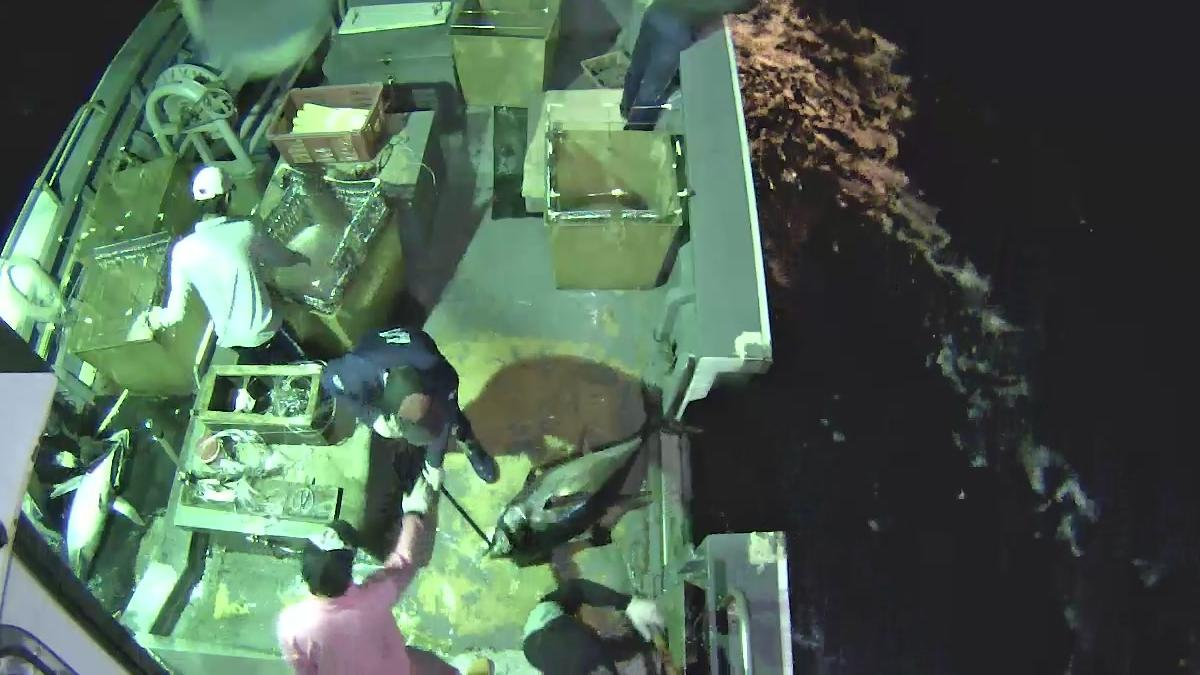

In [31]:
#ALB
from IPython.display import display, Image
Image(filename='/home/ubuntu/data/fish/test_stg2/unknown/image_02894.jpg')

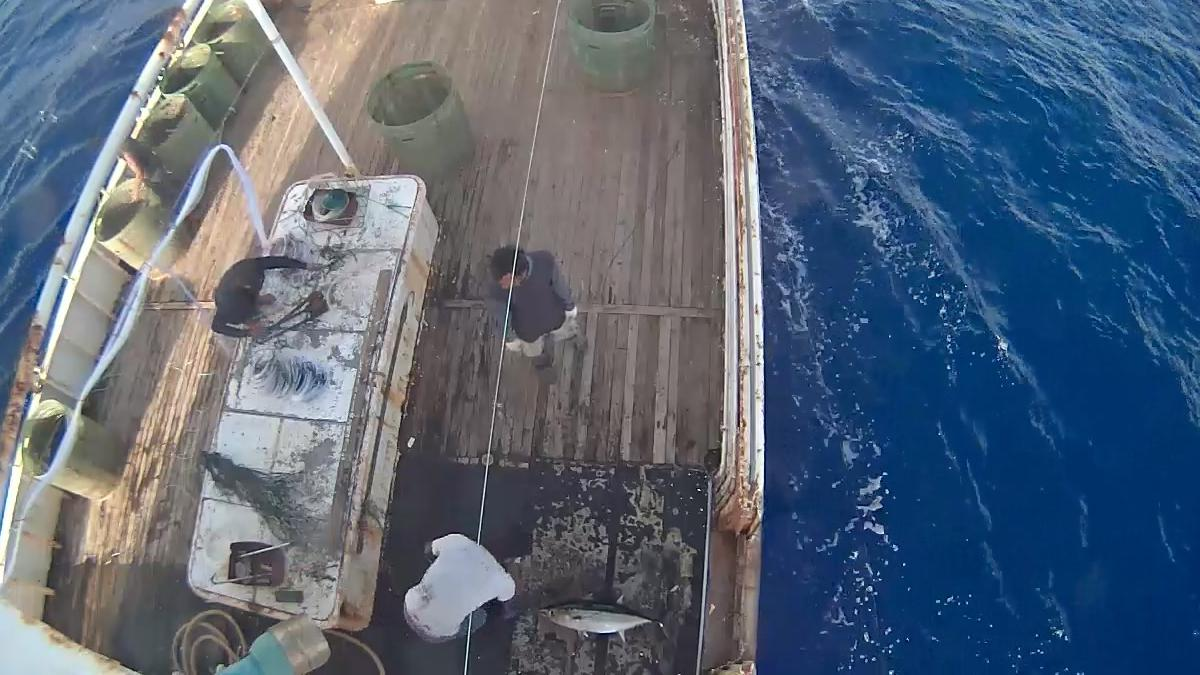

In [32]:
# no fish or YFT
Image(filename='/home/ubuntu/data/fish/test_stg2/unknown/image_06681.jpg') 

In [101]:
print subm_name
submission.to_csv(subm_name, index=False)#, header=False)#, compression='gzip')

/home/ubuntu/data/fish/results/subm_v3.csv


In [102]:
subm_name_stg1 = RESULTS_DIR+'subm_v2_stg1.csv'
subm_name_stg2 = RESULTS_DIR+'subm_v2_stg2.csv'
subm_nameFIXED = RESULTS_DIR+'subm_v2_FIXED.csv'

In [103]:
# split the output into stage1 and stage 2 files and use sed to replace text in files

!head -n +1001 $subm_name | sed "s:^unknown/::g" > $subm_name_stg1
!tail -n +1002 $subm_name | sed "s:^unknown:test_stg2:g" > $subm_name_stg2

In [104]:
# merge files back to submit
!cat $subm_name_stg1 $subm_name_stg2 > $subm_nameFIXED

In [105]:
# Submit Me
print subm_nameFIXED

/home/ubuntu/data/fish/results/subm_v2_FIXED.csv
